# Librerias

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from utils.datasets import (get_wine_dataset, label_encode, split_transpose)
from base.qda import QDA

# Dataset Wine

## Carga

In [ ]:
X_full, y_full, feature_names, label_names = get_wine_dataset()
X_full.shape, y_full.shape

# Información básica
n_obs, n_features = X_full.shape
print(f"Cantidad de muestras: {n_obs}")
print(f"Cantidad de características: {n_features}")
print(f"Cantidad de clases: {len(class_names)}")
print(f"Nombres caracteristicas: {feature_names}")
print(f"Nombres clases: {class_names}")
unique_classes, counts = np.unique(y_full, return_counts=True)
class_counts = dict(zip(unique_classes, counts))
print("Muestras por clase:", class_counts)

Cantidad de muestras: 178
Cantidad de características: 13
Cantidad de clases: 3
Nombres caracteristicas: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Nombres clases: ['class_0' 'class_1' 'class_2']
Muestras por clase: {'class_0': 59, 'class_1': 71, 'class_2': 48}


# Clasificacion

In [3]:
# Codifica etiquetas

y_full_encoded = label_encode(y_full)

# Separa train y test

X_train, X_test, y_train, y_test = split_transpose(X_full, y_full_encoded, 0.300, 1265)

print("X_train shape:", X_train.shape)
print("X_test  shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test  shape:", y_test.shape)

# Crea clasificador

qda = QDA()

# Entrena

qda.fit(X_train, y_train)

# Evalua

y_predict = qda.predict(X_test)


X_train shape: (13, 124)
X_test  shape: (13, 54)
y_train shape: (1, 124)
y_test  shape: (1, 54)
Probabilidad a priori de cada clase: [0.39516129 0.33870968 0.26612903]
Log-Probabilidad a priori de cada clase: [-0.92846127 -1.08261195 -1.323774  ]
Cantidad de Inversas de la covarianza: 3 [Formato: (13, 13)]
Cantidad de medias: 3 [Formato: (13, 1)]


# Metricas

Accuracy: 0.9815

Matriz de confusión:
[[10  0  0]
 [ 1 28  0]
 [ 0  0 15]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.97      0.98        29
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.97      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



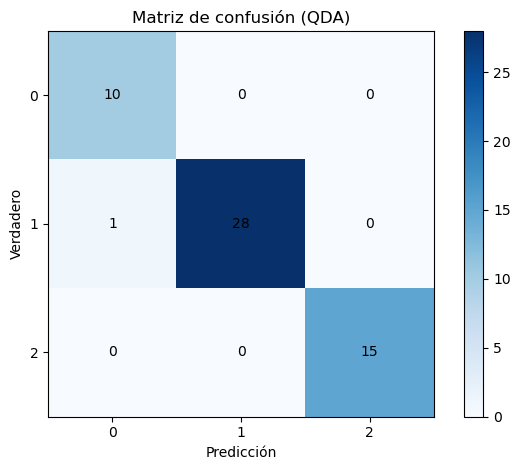

In [4]:
# Si y_predict y y_test tienen forma (1, n_obs), aplanarlos para métricas
y_pred_flat = y_predict.flatten()
y_test_flat = y_test.flatten()

# Accuracy
acc = accuracy_score(y_test_flat, y_pred_flat)
print(f"Accuracy: {acc:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_flat, y_pred_flat)
print("\nMatriz de confusión:")
print(cm)

# Reporte de clasificación (Precision, Recall, F1 por clase)
print("\nReporte de clasificación:")
print(classification_report(y_test_flat, y_pred_flat))

# Visualizar matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap='Blues')

ax.set_title("Matriz de confusión (QDA)")
ax.set_xlabel("Predicción")
ax.set_ylabel("Verdadero")
ax.set_xticks(range(len(np.unique(y_test_flat))))
ax.set_yticks(range(len(np.unique(y_test_flat))))
ax.set_xticklabels(np.unique(y_test_flat))
ax.set_yticklabels(np.unique(y_test_flat))

# Anotar valores dentro de las celdas
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

fig.colorbar(im)
plt.tight_layout()
plt.show()

